In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
base_dir = './../'
csv_dir = os.path.join(base_dir, "results", "csv")
roi_dir = os.path.join(base_dir, "results", "roi")
df1 = pd.read_csv(os.path.join(csv_dir, "causaldraw_annotation_preprocessed_final_bbox.csv"), index_col=0)
df2 = pd.read_csv(os.path.join(csv_dir, "causaldraw_annotation_stimulis_bounding_box.csv"), index_col=0)
gt = pd.read_csv(os.path.join(base_dir, "stimuli/causaldraw_rois.csv"))

In [3]:
df1.insert(1, 'stimuli', df1['sketchID'].apply(lambda x: x.split('.')[0]))

In [4]:
sketch_df = df1[["sketchID", "draw_x1", "draw_x2", "draw_y1", "draw_y2"]]
sketch_min = sketch_df.groupby("sketchID").min()[["draw_x1", "draw_y1"]].rename(columns={"draw_x1": "draw_x1_all", "draw_y1": "draw_y1_all"})
sketch_max = sketch_df.groupby("sketchID").max()[["draw_x2", "draw_y2"]].rename(columns={"draw_x2": "draw_x2_all", "draw_y2": "draw_y2_all"})
df1 = df1.merge(sketch_min, how="left", on="sketchID")
df1 = df1.merge(sketch_max, how="left", on="sketchID")

In [5]:
stimuli_df = df2[["stimuli", "stim_x1", "stim_x2", "stim_y1", "stim_y2"]]
stimuli_min = stimuli_df.groupby("stimuli").min()[["stim_x1", "stim_y1"]].rename(columns={"stim_x1": "stim_x1_all", "stim_y1": "stim_y1_all"})
stimuli_max = stimuli_df.groupby("stimuli").max()[["stim_x2", "stim_y2"]].rename(columns={"stim_x2": "stim_x2_all", "stim_y2": "stim_y2_all"})
df2 = df2.merge(stimuli_min, how="left", on="stimuli")
df2 = df2.merge(stimuli_max, how="left", on="stimuli")

In [6]:
df1.head(20)

,sketchID,stimuli,strokeRoiNum,condition,orig_gameID,strokeLabel,strokeType,draw_x1,draw_x2,draw_y1,draw_y2,draw_x1_all,draw_y1_all,draw_x2_all,draw_y2_all
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,268.0,400.0,160.0,292.0,152.0,145.0,400.0,312.0
1,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,152.0,301.0,145.0,312.0,152.0,145.0,400.0,312.0
2,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,5.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,background,background,99.0,368.0,135.0,389.0,99.0,135.0,374.0,389.0
3,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,1.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,159.0,249.0,163.0,245.0,99.0,135.0,374.0,389.0
4,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,2.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,298.0,371.0,162.0,253.0,99.0,135.0,374.0,389.0
5,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,3.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,causal,181.0,263.0,271.0,334.0,99.0,135.0,374.0,389.0
6,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,4.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,causal,296.0,374.0,280.0,355.0,99.0,135.0,374.0,389.0
7,gears_1.0524-70721cbe-8f3d-4e95-ad78-7b70a6f7c538,gears_1,4.0,explanatory,0524-70721cbe-8f3d-4e95-ad78-7b70a6f7c538,gear,causal,295.0,443.0,107.0,240.0,155.0,107.0,443.0,281.0
8,gears_1.0524-70721cbe-8f3d-4e95-ad78-7b70a6f7c538,gears_1,3.0,explanatory,0524-70721cbe-8f3d-4e95-ad78-7b70a6f7c538,gear,causal,155.0,309.0,152.0,281.0,155.0,107.0,443.0,281.0
9,gears_1.0587-0a7bf55b-0d5c-4936-ae31-e30191e2be59,gears_1,1.0,depictive,0587-0a7bf55b-0d5c-4936-ae31-e30191e2be59,gear,functional,145.0,281.0,174.0,313.0,84.0,92.0,441.0,471.0


In [7]:
df3 = df2.merge(df1[["sketchID", "stimuli", "condition"]].drop_duplicates("sketchID"), how="cross")
df3 = df3[df3["stimuli_x"] == df3["stimuli_y"]]
df3 = df3.rename(columns={"stimuli_x": "stimuli"}).drop(columns="stimuli_y")
df3

,stimuli,strokeRoiNum,stim_x1,stim_x2,stim_y1,stim_y2,stim_x1_all,stim_y1_all,stim_x2_all,stim_y2_all,sketchID,condition
0,gears_1,1.0,73,236,77,240,19,0,471,434,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,explanatory
1,gears_1,1.0,73,236,77,240,19,0,471,434,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,depictive
2,gears_1,1.0,73,236,77,240,19,0,471,434,gears_1.0524-70721cbe-8f3d-4e95-ad78-7b70a6f7c538,explanatory
3,gears_1,1.0,73,236,77,240,19,0,471,434,gears_1.0587-0a7bf55b-0d5c-4936-ae31-e30191e2be59,depictive
4,gears_1,1.0,73,236,77,240,19,0,471,434,gears_1.0641-f65a5813-73f1-4a74-8400-1df917c1e4d7,explanatory
...,...,...,...,...,...,...,...,...,...,...,...,...
11555,pulleys_2,7.0,178,469,4,475,178,4,469,475,pulleys_2.8798-4a19eaf6-12f9-4a97-adf2-469707d...,explanatory
11556,pulleys_2,7.0,178,469,4,475,178,4,469,475,pulleys_2.9226-c136ef9a-0131-4850-bf5f-1beaf85...,explanatory
11557,pulleys_2,7.0,178,469,4,475,178,4,469,475,pulleys_2.9393-2960082e-f208-4821-ac8e-759fbc3...,depictive
11558,pulleys_2,7.0,178,469,4,475,178,4,469,475,pulleys_2.9438-e9871158-5512-4dca-9edd-11caab6...,explanatory


In [8]:
df = df1.merge(df3, how="outer", on=["stimuli", "strokeRoiNum", "sketchID", "condition"])

In [9]:
df["draw_loc_x"] = (df["draw_x1"] + df["draw_x2"]) / 2
df["draw_loc_y"] = (df["draw_y1"] + df["draw_y2"]) / 2
df["draw_loc_x_all"] = (df["draw_x1_all"] + df["draw_x2_all"]) / 2
df["draw_loc_y_all"] = (df["draw_y1_all"] + df["draw_y2_all"]) / 2
df["stim_loc_x"] = (df["stim_x1"] + df["stim_x2"]) / 2
df["stim_loc_y"] = (df["stim_y1"] + df["stim_y2"]) / 2
df["stim_loc_x_all"] = (df["stim_x1_all"] + df["stim_x2_all"]) / 2
df["stim_loc_y_all"] = (df["stim_y1_all"] + df["stim_y2_all"]) / 2

In [10]:
df["draw_size_x"] = df["draw_x2"] - df["draw_x1"]
df["draw_size_y"] = df["draw_y2"] - df["draw_y1"]
df["draw_size_x_all"] = df["draw_x2_all"] - df["draw_x1_all"]
df["draw_size_y_all"] = df["draw_y2_all"] - df["draw_y1_all"]
df["stim_size_x"] = df["stim_x2"] - df["stim_x1"]
df["stim_size_y"] = df["stim_y2"] - df["stim_y1"]
df["stim_size_x_all"] = df["stim_x2_all"] - df["stim_x1_all"]
df["stim_size_y_all"] = df["stim_y2_all"] - df["stim_y1_all"]

In [11]:
df = df.drop(columns=["draw_x1", "draw_x2", "draw_y1", "draw_y2", 
                      "draw_x1_all", "draw_x2_all", "draw_y1_all", "draw_y2_all", 
                      "stim_x1", "stim_x2", "stim_y1", "stim_y2",
                      "stim_x1_all", "stim_x2_all", "stim_y1_all", "stim_y2_all"])

In [12]:
df

,sketchID,stimuli,strokeRoiNum,condition,orig_gameID,strokeLabel,strokeType,draw_loc_x,draw_loc_y,draw_loc_x_all,...,stim_loc_x_all,stim_loc_y_all,draw_size_x,draw_size_y,draw_size_x_all,draw_size_y_all,stim_size_x,stim_size_y,stim_size_x_all,stim_size_y_all
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,334.0,226.0,276.0,...,245.0,217.0,132.0,132.0,248.0,167.0,159,157,452,434
1,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,226.5,228.5,276.0,...,245.0,217.0,149.0,167.0,248.0,167.0,159,154,452,434
2,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,5.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,background,background,233.5,262.0,236.5,...,245.0,217.0,269.0,254.0,275.0,254.0,350,424,452,434
3,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,1.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,204.0,204.0,236.5,...,245.0,217.0,90.0,82.0,275.0,254.0,163,163,452,434
4,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,2.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,334.5,207.5,236.5,...,245.0,217.0,73.0,91.0,275.0,254.0,163,164,452,434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,pulleys_2.8624-cf726450-c50a-42ab-a8d5-99b5d0a...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,323.5,239.5,NaN,NaN,NaN,NaN,67,308,291,471
1921,pulleys_2.9226-c136ef9a-0131-4850-bf5f-1beaf85...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,323.5,239.5,NaN,NaN,NaN,NaN,67,308,291,471
1922,pulleys_2.9438-e9871158-5512-4dca-9edd-11caab6...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,323.5,239.5,NaN,NaN,NaN,NaN,67,308,291,471
1923,pulleys_2.0219-e77f751a-a934-4602-97a0-f2c0bd8...,pulleys_2,7.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,323.5,239.5,NaN,NaN,NaN,NaN,291,471,291,471


In [13]:
df["loc_err"] = np.sqrt((df["draw_loc_x"] - df["stim_loc_x"]) ** 2 + (df["draw_loc_y"] - df["stim_loc_y"]) ** 2) / np.sqrt(df["stim_size_x_all"] * df["stim_size_x_all"] + df["stim_size_y_all"] * df["stim_size_y_all"])
df["size_err"] = np.abs(df["draw_size_x"] * df["draw_size_y"] - df["stim_size_x"] * df["stim_size_y"]) / (df["stim_size_x"] * df["stim_size_y"])

In [14]:
df

,sketchID,stimuli,strokeRoiNum,condition,orig_gameID,strokeLabel,strokeType,draw_loc_x,draw_loc_y,draw_loc_x_all,...,draw_size_x,draw_size_y,draw_size_x_all,draw_size_y_all,stim_size_x,stim_size_y,stim_size_x_all,stim_size_y_all,loc_err,size_err
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,334.0,226.0,276.0,...,132.0,132.0,248.0,167.0,159,157,452,434,0.096894,0.302007
1,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,226.5,228.5,276.0,...,149.0,167.0,248.0,167.0,159,154,452,434,0.151372,0.016213
2,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,5.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,background,background,233.5,262.0,236.5,...,269.0,254.0,275.0,254.0,350,424,452,434,0.089712,0.539582
3,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,1.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,204.0,204.0,236.5,...,90.0,82.0,275.0,254.0,163,163,452,434,0.107296,0.722233
4,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,2.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,334.5,207.5,236.5,...,73.0,91.0,275.0,254.0,163,164,452,434,0.208802,0.751496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,pulleys_2.8624-cf726450-c50a-42ab-a8d5-99b5d0a...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67,308,291,471,NaN,NaN
1921,pulleys_2.9226-c136ef9a-0131-4850-bf5f-1beaf85...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67,308,291,471,NaN,NaN
1922,pulleys_2.9438-e9871158-5512-4dca-9edd-11caab6...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67,308,291,471,NaN,NaN
1923,pulleys_2.0219-e77f751a-a934-4602-97a0-f2c0bd8...,pulleys_2,7.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,291,471,291,471,NaN,NaN


In [15]:
df_mean = df.groupby(["stimuli"]).mean()
df_sketch_mean = df_mean[["draw_loc_x_all", "draw_loc_y_all", "draw_size_x_all", "draw_size_y_all"]].rename(columns={"draw_loc_x_all": "loc_x_all", "draw_loc_y_all": "loc_y_all", "draw_size_x_all": "size_x_all", "draw_size_y_all": "size_y_all"})
df_stimuli_mean = df_mean[["stim_loc_x_all", "stim_loc_y_all", "stim_size_x_all", "stim_size_y_all"]].rename(columns={"stim_loc_x_all": "loc_x_all", "stim_loc_y_all": "loc_y_all", "stim_size_x_all": "size_x_all", "stim_size_y_all": "size_y_all"})

In [16]:
df_diff = df_sketch_mean[["loc_x_all", "loc_y_all"]] - df_stimuli_mean[["loc_x_all", "loc_y_all"]]
df_diff[["size_x_all", "size_y_all"]] = df_sketch_mean[["size_x_all", "size_y_all"]] / df_stimuli_mean[["size_x_all", "size_y_all"]]
df_diff = df_diff.rename(columns={"loc_x_all": "loc_x_offset", "loc_y_all": "loc_y_offset", "size_x_all": "size_x_offset", "size_y_all": "size_y_offset"})
df_diff

,loc_x_offset,loc_y_offset,size_x_offset,size_y_offset
stimuli,,,,
gears_1,-5.222222,24.335648,0.668060,0.687265
gears_2,19.412829,9.356908,0.902421,1.085334
levers_1,40.687747,0.573123,0.986715,1.114579
levers_2,43.810757,9.143426,0.946947,0.834341
pulleys_1,41.873272,4.428571,0.974654,0.866754
pulleys_2,-85.575472,-8.332547,1.003080,0.783510


In [17]:
df = df.merge(df_diff, how="left", on="stimuli")

In [18]:
df["norm_draw_loc_x"] = df["draw_loc_x"] - df["loc_x_offset"]
df["norm_draw_loc_y"] = df["draw_loc_y"] - df["loc_y_offset"]
df["norm_draw_size_x"] = df["draw_size_x"] / df["size_x_offset"]
df["norm_draw_size_y"] = df["draw_size_y"] / df["size_y_offset"]
df["norm_loc_err"] = np.sqrt((df["norm_draw_loc_x"] - df["stim_loc_x"]) ** 2 + (df["norm_draw_loc_y"] - df["stim_loc_y"]) ** 2) / np.sqrt(df["stim_size_x_all"] * df["stim_size_x_all"] + df["stim_size_y_all"] * df["stim_size_y_all"])
df["norm_size_err"] = np.abs(df["norm_draw_size_x"] * df["norm_draw_size_y"] - df["stim_size_x"] * df["stim_size_y"]) / (df["stim_size_x"] * df["stim_size_y"])

In [19]:
df = df.drop(columns=["loc_x_offset", "loc_y_offset", "size_x_offset", "size_y_offset"])

In [20]:
df

,sketchID,stimuli,strokeRoiNum,condition,orig_gameID,strokeLabel,strokeType,draw_loc_x,draw_loc_y,draw_loc_x_all,...,stim_size_x_all,stim_size_y_all,loc_err,size_err,norm_draw_loc_x,norm_draw_loc_y,norm_draw_size_x,norm_draw_size_y,norm_loc_err,norm_size_err
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,334.0,226.0,276.0,...,452,434,0.096894,0.302007,339.222222,201.664352,197.587146,192.065563,0.108875,0.520237
1,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,226.5,228.5,276.0,...,452,434,0.151372,0.016213,231.722222,204.164352,223.033975,242.992037,0.187531,1.213325
2,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,5.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,background,background,233.5,262.0,236.5,...,452,434,0.089712,0.539582,238.722222,237.664352,402.658653,369.580704,0.075621,0.002796
3,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,1.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,204.0,204.0,236.5,...,452,434,0.107296,0.722233,209.222222,179.664352,134.718509,119.313456,0.093632,0.395019
4,gears_1.0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gears_1,2.0,depictive,0366-5aa209bd-fda5-4afd-b896-9371d73ab1df,gear,functional,334.5,207.5,236.5,...,452,434,0.208802,0.751496,339.722222,183.164352,109.271679,132.408835,0.174940,0.458756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,pulleys_2.8624-cf726450-c50a-42ab-a8d5-99b5d0a...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,291,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,pulleys_2.9226-c136ef9a-0131-4850-bf5f-1beaf85...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,291,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,pulleys_2.9438-e9871158-5512-4dca-9edd-11caab6...,pulleys_2,6.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,291,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,pulleys_2.0219-e77f751a-a934-4602-97a0-f2c0bd8...,pulleys_2,7.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,...,291,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization

In [21]:
df = df.sort_values(by=["sketchID", "strokeRoiNum"])

In [22]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [23]:
df = df.drop(columns=["draw_loc_x", "draw_loc_y", "draw_loc_x_all", "draw_loc_y_all", 
                      "draw_size_x", "draw_size_y", "draw_size_x_all", "draw_size_y_all",
                      "stim_loc_x", "stim_loc_y", "stim_loc_x_all", "stim_loc_y_all", 
                      "stim_size_x", "stim_size_y", "stim_size_x_all", "stim_size_y_all"])
df = df.drop(columns=["norm_draw_loc_x", "norm_draw_loc_y", "norm_draw_size_x", "norm_draw_size_y"])
# df = df.drop(columns=["norm_stim_loc_x", "norm_stim_loc_y", "norm_stim_size_x", "norm_stim_size_y"])
df['omission'] = df.isna().sum(axis=1).apply(lambda x: 0 if x == 0 else 1)
df

,sketchID,stimuli,strokeRoiNum,condition,orig_gameID,strokeLabel,strokeType,loc_err,size_err,norm_loc_err,norm_size_err,omission
1453,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,1.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1459,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,2.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,0.151372,0.016213,0.187531,1.213325,0
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gear,causal,0.096894,0.302007,0.108875,0.520237,0
1470,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,5.0,explanatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,pulleys_2,3.0,depictive,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,wheel,functional,0.114823,0.540984,0.179372,0.415952,0
1452,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,pulleys_2,4.0,depictive,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,wheel,functional,0.122190,1.280151,0.194656,1.901241,0
1892,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,pulleys_2,5.0,depictive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1449,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,pulleys_2,6.0,depictive,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,string,functional,0.179721,0.957259,0.226466,0.945617,0


In [24]:
df["orig_gameID"] = df["sketchID"].apply(lambda x: x.split(".")[1])

In [25]:
def decide_type(x):
    causal = x["causal"]
    functional = x["functional"]
    
    if causal:
        return "causal"
    elif functional:
        return "functional"
    else:
        return "background"

gt = gt.rename(columns={"roi_name": "strokeLabel_gt"})
gt["strokeType_gt"] = gt[["causal", "functional"]].apply(decide_type, axis=1)

In [26]:
df = df.merge(gt[["toy_id", "roi_num", "strokeLabel_gt", "strokeType_gt"]], left_on=["stimuli", "strokeRoiNum"], right_on=["toy_id", "roi_num"])

In [27]:
df = df[["sketchID", "orig_gameID", "stimuli", "strokeRoiNum", "condition", "strokeLabel", "strokeType", "strokeLabel_gt", "strokeType_gt", "loc_err", "size_err", "norm_loc_err", "norm_size_err", "omission"]]
df = df.rename(columns={"strokeRoiNum": "roiNum", "strokeLabel": "label", "strokeType": "type", "strokeLabel_gt": "label_gt", "strokeType_gt": "type_gt"})
df = df.sort_values(["sketchID", "roiNum"])
df

,sketchID,orig_gameID,stimuli,roiNum,condition,label,type,label_gt,type_gt,loc_err,size_err,norm_loc_err,norm_size_err,omission
0,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,1.0,explanatory,NaN,NaN,gear,functional,NaN,NaN,NaN,NaN,1
49,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,2.0,explanatory,NaN,NaN,gear,functional,NaN,NaN,NaN,NaN,1
98,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,3.0,explanatory,gear,causal,gear,causal,0.151372,0.016213,0.187531,1.213325,0
147,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,4.0,explanatory,gear,causal,gear,causal,0.096894,0.302007,0.108875,0.520237,0
196,gears_1.0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,0219-e77f751a-a934-4602-97a0-f2c0bd8bd638,gears_1,5.0,explanatory,NaN,NaN,background,background,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,pulleys_2,3.0,depictive,wheel,functional,wheel,functional,0.114823,0.540984,0.179372,0.415952,0
1780,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,pulleys_2,4.0,depictive,wheel,functional,wheel,functional,0.122190,1.280151,0.194656,1.901241,0
1828,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,pulleys_2,5.0,depictive,NaN,NaN,string,causal,NaN,NaN,NaN,NaN,1
1876,pulleys_2.9810-988306f1-19e0-4158-a007-261fc2d...,9810-988306f1-19e0-4158-a007-261fc2d3ae0b,pulleys_2,6.0,depictive,string,functional,string,functional,0.179721,0.957259,0.226466,0.945617,0


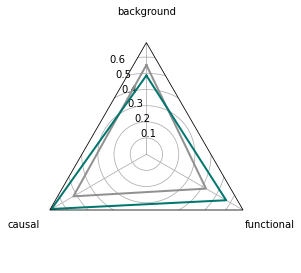

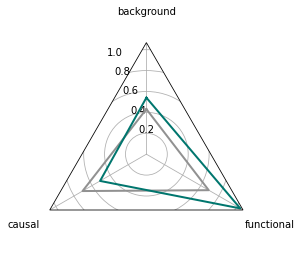

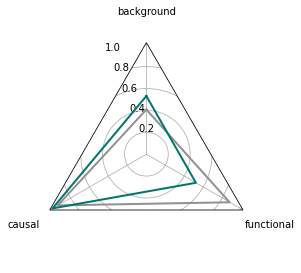

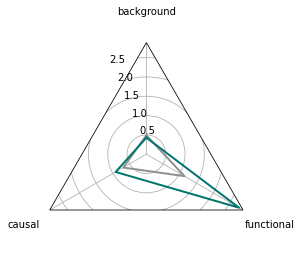

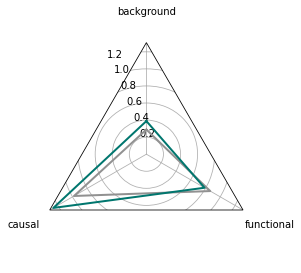

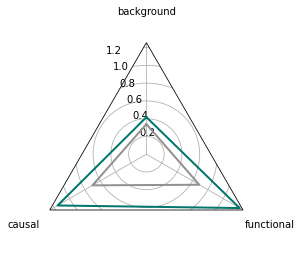

In [29]:
vis_data = df.groupby(["stimuli", "condition", "type"]).mean().reset_index()
vis_data
import matplotlib.ticker as ticker
stimulis = vis_data["stimuli"].unique()
for i in range(6):
    stimuli = stimulis[i]
    sub_data = vis_data[(vis_data["stimuli"] == stimuli)]

    N = len(sub_data["type"].unique())
    theta = radar_factory(N, frame='polygon')

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    variables = sub_data["type"].unique()
    ax.set_varlabels(variables)
    #     ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

    ax.tick_params("x", pad=20)

    data = sub_data[(sub_data["condition"] == "depictive")]["norm_size_err"]
    ax.plot(theta, data, color="#919191", lw=2)
#     ax.fill(theta, data, facecolor="#919191", alpha=0.25)

    data = sub_data[(sub_data["condition"] == "explanatory")]["norm_size_err"]
    ax.plot(theta, data, color="#00766E", lw=2)
#     ax.fill(theta, data, facecolor="#00766E", alpha=0.25)
    # ax.set_ylim(bottom=0, top=120)


    #     plt.savefig(base_dir + "results/plots/" + stimuli + "_norm_loc_err" + ".png", bbox_inches="tight")
    plt.show()

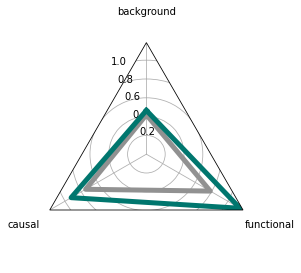

In [30]:
vis_data = df.groupby(["condition", "type"]).mean().reset_index()
vis_data
sub_data = vis_data

N = len(sub_data["type"].unique())
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

variables = sub_data["type"].unique()
ax.set_varlabels(variables)
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(20))

ax.tick_params("x", pad=20)

data = sub_data[(sub_data["condition"] == "depictive")]["norm_size_err"]
ax.plot(theta, data, color="#919191", lw=5)
#     ax.fill(theta, data, facecolor="#919191", alpha=0.25)

data = sub_data[(sub_data["condition"] == "explanatory")]["norm_size_err"]
ax.plot(theta, data, color="#00766E", lw=5)
#     ax.fill(theta, data, facecolor="#00766E", alpha=0.25)
# ax.set_ylim(bottom=0, top=120)


#     plt.savefig(base_dir + "results/plots/" + stimuli + "_norm_loc_err" + ".png", bbox_inches="tight")
plt.show()

In [31]:
df.to_csv(os.path.join(csv_dir,'causaldraw_annotation_final_spatial_error_drop.csv'))